In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
from operator import itemgetter
import  collections
from operator import itemgetter

Using **left** parties dataset

In [97]:
nodes_df   = pd.read_csv('subsets/NODES_sinistra_hate_subset.csv', low_memory=False)
edges_df   = pd.read_csv('subsets/EDGES_sinistra_hate_subset.csv', low_memory=False)
subset_str = 'LEFT'

Using **right** parties dataset

In [60]:
nodes_df   = pd.read_csv('subsets/NODES_destra_hate_subset.csv', low_memory=False)
edges_df   = pd.read_csv('subsets/EDGES_destra_hate_subset.csv', low_memory=False)
subset_str = 'RIGHT'

In [98]:
nodes_df

,id,label,counts_hate,counts_prob,counts_pos,polarity
0,0,giornalista,1,21,97,-1.000000
1,1,lecchina,0,2,0,0.251332
2,2,salvare,0,13,84,1.000000
3,3,bruciare,1,5,37,-1.000000
4,4,ano,0,1,1,-0.644713
...,...,...,...,...,...,...
29504,29505,ilegale,0,0,0,-0.288769
29505,29506,scappereccio,0,0,0,0.000000
29506,29507,sconfiggerlo,0,0,0,-1.000000
29507,29508,luomo,0,0,0,1.000000


In [99]:
edges_df

,source,target,weight
0,0,1287,2
1,0,740,4
2,0,1288,1
3,0,1289,1
4,0,1290,1
...,...,...,...
2101433,29499,29501,2
2101434,29499,29502,2
2101435,29500,29501,1
2101436,29500,29502,1


**Creating NetworkX Graph object**

In [100]:
G = nx.from_pandas_edgelist(edges_df, 'source', 'target', ['weight'])

In [101]:
data = nodes_df.set_index('id').to_dict('index').items()
data

dict_items([(0, {'label': 'giornalista', 'counts_hate': 1, 'counts_prob': 21, 'counts_pos': 97, 'polarity': -1.0}), (1, {'label': 'lecchina', 'counts_hate': 0, 'counts_prob': 2, 'counts_pos': 0, 'polarity': 0.2513318327560048}), (2, {'label': 'salvare', 'counts_hate': 0, 'counts_prob': 13, 'counts_pos': 84, 'polarity': 1.0}), (3, {'label': 'bruciare', 'counts_hate': 1, 'counts_prob': 5, 'counts_pos': 37, 'polarity': -1.0}), (4, {'label': 'ano', 'counts_hate': 0, 'counts_prob': 1, 'counts_pos': 1, 'polarity': -0.6447133293200356}), (5, {'label': '#salvini', 'counts_hate': 1, 'counts_prob': 3, 'counts_pos': 15, 'polarity': 0.0}), (6, {'label': 'vaffamculo', 'counts_hate': 0, 'counts_prob': 1, 'counts_pos': 0, 'polarity': 0.0}), (7, {'label': 'reddito', 'counts_hate': 0, 'counts_prob': 12, 'counts_pos': 147, 'polarity': 1.0}), (8, {'label': 'cittadinanza', 'counts_hate': 0, 'counts_prob': 11, 'counts_pos': 113, 'polarity': 0.0}), (9, {'label': 'lavoro', 'counts_hate': 0, 'counts_prob': 3,

In [102]:
G.add_nodes_from(data)

Printing some Graph information

In [103]:
#Checking if the edges and nodes were added successfully
print(nx.info(G)) # Print information about the Graph

Name: 
Type: Graph
Number of nodes: 29510
Number of edges: 2101438
Average degree: 142.4221


###Some Network Statistics below can be done using Gephi while others are more flexible to try in Python

 ### **PART ONE:** Metrics Related to the network structure (Density, Transitivity)

**DENSITY**

In [104]:
#Overall Density of the network
density = nx.density(G)
print("Network density:", density)

Network density: 0.004826395140647061


This **Density** value just means that our network is weakly connected, this is predictable since we are dealing with a huge network.

## TAKES TOO MUCH, DO NOT RUN

**TRANSITIVITY**

In [105]:
# #Overall Density of the network
# transitivity = nx.transitivity(G)
# print("Network transitivity:", transitivity)

**Transitivity** is just a way to measure triadic closure, teh value we get tells us how the nodes are interconnected. This suggest that we should look more into the importance of each node(degrees, centrality, page rank etc..) using the metrics in PART 2. 

### **PART TWO:** Metrics Related to the importance of each node
In this section we add new attributes to each node depending on its centrality, degree...

**DEGREES** : Create **degrees dictionary**, mapping each word to their respective degrees. 

In [106]:
degree_dict = dict(G.degree(G.nodes()))
nx.set_node_attributes(G, degree_dict, 'degree')
#It is important to set degree as an attribute of node alongside the other attributes 

In [107]:
#Sorting in desceding order (this will be important if we want to use nodes removal)
sorted_degree = sorted(degree_dict.items(), key=itemgetter(1), reverse=True)
labels_dict   = nx.get_node_attributes(G,'label')

In [108]:
print("Top 20 nodes by degree:")
for d in sorted_degree[:20]:
    print(d, labels_dict.get(d[0]))

Top 20 nodes by degree:
(202, 8236) fare
(463, 8134) partire
(132, 7988) anno
(122, 7931) politico
(78, 7389) sempre
(342, 7319) quando
(128, 7204) parlare
(374, 7054) potere
(46, 6858) italiano
(268, 6848) italia
(34, 6546) governare
(83, 6476) lavorare
(237, 6453) dire
(269, 6245) pd
(353, 6180) persona
(17, 6133) salvini
(280, 6065) votare
(379, 5938) bene
(715, 5824) mettere
(27, 5800) andare


In [109]:
hate_index_dict = nx.get_node_attributes(G,'counts_hate')
sorted_hate_index = sorted(hate_index_dict.items(), key=itemgetter(1), reverse=True)
print("Top 20 nodes by hate_index:")
for d in sorted_hate_index[:20]:
    print(d, labels_dict.get(d[0]))

Top 20 nodes by hate_index:
(46, 12) italiano
(78, 10) sempre
(414, 9) paese
(26, 9) merda
(122, 8) politico
(1165, 8) vergognare
(249, 7) cazzo
(17, 6) salvini
(1028, 6) patrio
(379, 6) bene
(536, 6) fascista
(42, 6) vivere
(268, 6) italia
(1304, 6) coglione
(73, 6) feccia
(3909, 6) islamico
(132, 5) anno
(202, 5) fare
(1320, 5) milione
(2476, 5) clandestino


In [110]:
hate_polar_dict = nx.get_node_attributes(G,'polarity')
sorted_hate_polar = sorted(hate_polar_dict.items(), key=itemgetter(1), reverse=False)
print("Top 20 nodes by polarity:")
for d in sorted_hate_polar[:20]:
    print(d, labels_dict.get(d[0]))

Top 20 nodes by polarity:
(0, -1.0) giornalista
(1287, -1.0) pianeta
(1292, -1.0) ettaro
(1293, -1.0) terreno
(1298, -1.0) criticare
(1299, -1.0) dieci
(1300, -1.0) soffocato
(3247, -1.0) chiamalo
(3249, -1.0) litigata
(3251, -1.0) opposizione
(2005, -1.0) diviso
(3370, -1.0) celare
(3201, -1.0) vergognoso
(863, -1.0) usare
(661, -1.0) cittadino
(303, -1.0) quello
(4412, -1.0) servo
(3324, -1.0) delusione
(6427, -1.0) telecamera
(1077, -1.0) campagna


## Degree Distribution plots ( LOG SCALE) and fit for gamma

In [111]:
def plot_degree_histogram(g, normalized=True):
    print("Creating histogram...")
    aux_y = nx.degree_histogram(g)
    
    aux_x = np.arange(0,len(aux_y)).tolist()
    
    n_nodes = g.number_of_nodes()
    
    if normalized:
        for i in range(len(aux_y)):
            aux_y[i] = aux_y[i]/n_nodes
    
    return aux_x, aux_y


def drop_zeros(a_list):
    return [i for i in a_list if i>0]

def log_binning(counter_dict,bin_count=35, normalized = False):

    max_x = np.log10(max(counter_dict.keys()))
    max_y = np.log10(max(counter_dict.values()))
    max_base = max([max_x,max_y])

    min_x = np.log10(min(drop_zeros(counter_dict.keys())))

    bins = np.logspace(min_x,max_base,num=bin_count)
    
    keys   = np.asarray([*counter_dict.keys()])
    values = np.asarray([*counter_dict.values()])

    # Based off of: http://stackoverflow.com/questions/6163334/binning-data-in-python-with-scipy-numpy
    bin_means_y = (np.histogram(keys,bins,weights=values)[0] / np.histogram(keys,bins)[0])
    bin_means_x = (np.histogram(keys,bins,weights=keys)[0] / np.histogram(keys,bins)[0])

    if (normalized == True):
        total = 0.
        for i in range(bin_count - 1):
            total += bin_means_y[i]*(bin_means_x[i])
        
        bin_means_y /= total
        
    return bin_means_x, bin_means_y

Creating histogram...


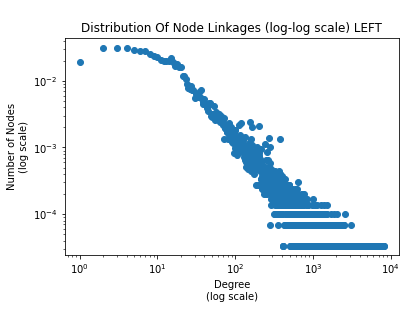

In [112]:
aux_x , aux_y = plot_degree_histogram(G, normalized=True)
plt.title('\nDistribution Of Node Linkages (log-log scale) ' + subset_str )
plt.xlabel('Degree\n(log scale)')
plt.ylabel('Number of Nodes\n(log scale)')
plt.xscale("log")
plt.yscale("log")

plt.plot(aux_x, aux_y, 'o')

## Fit and compute gamma

In [113]:
ba_c2 = dict(collections.Counter(degree_dict.values()))
ba_x,ba_y = log_binning(ba_c2, 20, True)

In [114]:
k_min = 1e1
number_nodes = len(nodes_df)

indexes_to_keep = [(ba_x >= k_min) & (ba_x <= 1.5e3)]
x = ba_x[tuple(indexes_to_keep)]
y = np.log10(ba_y[tuple(indexes_to_keep)])

gamma_param = np.polyfit(x, y, 1, full = True)
gamma =  gamma_param[0][1]


print("Gamma of the model is: ", gamma, "+-", gamma_param[3][1])
print("Natural cutoff is: ", k_min*(number_nodes**(1./(-gamma-1.)) ) )

Gamma of the model is:  -2.7399803072963578 +- 0.5906330337059084
Natural cutoff is:  3706.537839413245


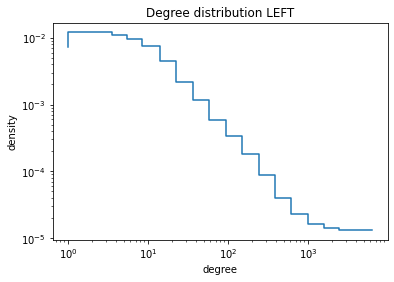

In [115]:
plt.step(ba_x, ba_y)
plt.xscale('log')
plt.xlabel('degree')
plt.ylabel('density')
plt.yscale('log')
plt.title('Degree distribution '+ subset_str)
plt.show()

## DO NOT RUN. IT TAKES TOO LONG

**Betweeness Centrality Dictionary**

It is quite informative to see what is the most central node in the network. This measure is more relevant because it doesn’t care about the number of edges any one node or set of nodes has. Betweenness centrality looks at all the shortest paths that pass through a particular node.

In [116]:
# #Inspecting the centrality of each node --> important if we want to implement nodes removal
# betweenness_dict = nx.betweenness_centrality(G) # Run betweenness centrality
# nx.set_node_attributes(G, betweenness_dict, 'betweenness')

In [117]:
# sorted_betweenness = sorted(betweenness_dict.items(), key=itemgetter(1), reverse=True)
# print("Top 20 nodes by betweenness centrality:")
# for b in sorted_betweenness[:20]:
#     print(b)

Well, it is very expected that nodes with high degrees would have high centrality but it would be more interesting to see if there are any nodes with low degrees and high centrality. Below we append both attributes to investigate this hypothesis.

In [118]:
# #First get the top 20 nodes by betweenness as a list
# top_betweenness = sorted_betweenness[:20]

# #Then find and print their degree
# for tb in top_betweenness: # Loop through top_betweenness
#     degree = degree_dict[tb[0]] # Use degree_dict to access a node's degree,
#     print("Name:", tb[0], "| Betweenness Centrality:", tb[1], "| Degree:", degree)

**Pagerank score**

In [119]:
pagerank_dict = nx.pagerank(G, alpha=0.9)
nx.set_node_attributes(G, pagerank_dict, 'pagerank')

sorted_pagerank = sorted(pagerank_dict.items(), key=itemgetter(1), reverse=True)
print("Top 20 nodes by pagerank:")
for b in sorted_pagerank[:20]:
    print(b, labels_dict.get(b[0]))

Top 20 nodes by pagerank:
(122, 0.005947872649279753) politico
(46, 0.0053553005084633195) italiano
(463, 0.0051540287520447205) partire
(132, 0.005119747162342318) anno
(202, 0.004906239233556613) fare
(268, 0.004395783518517127) italia
(269, 0.004344890114446856) pd
(83, 0.004258399440699227) lavorare
(78, 0.0040730033880730515) sempre
(34, 0.004070800467835573) governare
(442, 0.0039168660299487255) europeo
(342, 0.0036560358188879693) quando
(128, 0.003642328543516698) parlare
(374, 0.003613685194656089) potere
(280, 0.0035472296500223374) votare
(17, 0.003496742342996106) salvini
(353, 0.003301904430798227) persona
(1040, 0.0032274671258385977) sinistro
(237, 0.0030458966178921283) dire
(414, 0.0028787756527271237) paese


In [120]:
#First get the top 20 nodes by betweenness as a list
top_pagerank = sorted_pagerank[:20]

#Then find and print their degree
for t_pr in top_pagerank: # Loop through top_betweenness
    degree = degree_dict[t_pr[0]] # Use degree_dict to access a node's degree,
#     betweenness_node = betweenness_dict[t_pr[0]]
    print("Name:", labels_dict.get(t_pr[0]), "| Pagerank:", t_pr[1], 
#           "| Betweenness Centrality:", betweenness_node, 
          "| Degree:", degree,  )

Name: politico | Pagerank: 0.005947872649279753 | Degree: 7931
Name: italiano | Pagerank: 0.0053553005084633195 | Degree: 6858
Name: partire | Pagerank: 0.0051540287520447205 | Degree: 8134
Name: anno | Pagerank: 0.005119747162342318 | Degree: 7988
Name: fare | Pagerank: 0.004906239233556613 | Degree: 8236
Name: italia | Pagerank: 0.004395783518517127 | Degree: 6848
Name: pd | Pagerank: 0.004344890114446856 | Degree: 6245
Name: lavorare | Pagerank: 0.004258399440699227 | Degree: 6476
Name: sempre | Pagerank: 0.0040730033880730515 | Degree: 7389
Name: governare | Pagerank: 0.004070800467835573 | Degree: 6546
Name: europeo | Pagerank: 0.0039168660299487255 | Degree: 5171
Name: quando | Pagerank: 0.0036560358188879693 | Degree: 7319
Name: parlare | Pagerank: 0.003642328543516698 | Degree: 7204
Name: potere | Pagerank: 0.003613685194656089 | Degree: 7054
Name: votare | Pagerank: 0.0035472296500223374 | Degree: 6065
Name: salvini | Pagerank: 0.003496742342996106 | Degree: 6133
Name: persona

### PART 3: **Nodes Removal **
In this section we try to remove a set of nodes one by one to see how it affects the robustness of the network.

### By degree

In [121]:
#Here we select the nodes and sort them by degree
selected_nodes = list(sorted_degree)[:2000] #20 nodes to be removed just for simplicity you can choose any number
#TOP 2000 nodes to remove
nodes_removed = []
for i,v in enumerate(selected_nodes): 
    nodes_removed.append(selected_nodes[i][0])

In [122]:
#Node Removal, for robustness, removing 1 by 1 starting by nodes with highest degrees
G1 = G.copy()
list_density = []
nodes_rem = []
for i, node in enumerate(nodes_removed):
    if (i % 50 == 0):
        print("Removing ", i ,"/", len(nodes_removed))
    G1.remove_node(node)
    list_density.append(nx.density(G1)) #returns an error 
    #list_transitivity.append(nx.transitivity(G1)) #we can use it to measure robustness
    nodes_rem.append(i+1)

Removing  0 / 2000
Removing  50 / 2000
Removing  100 / 2000
Removing  150 / 2000
Removing  200 / 2000
Removing  250 / 2000
Removing  300 / 2000
Removing  350 / 2000
Removing  400 / 2000
Removing  450 / 2000
Removing  500 / 2000
Removing  550 / 2000
Removing  600 / 2000
Removing  650 / 2000
Removing  700 / 2000
Removing  750 / 2000
Removing  800 / 2000
Removing  850 / 2000
Removing  900 / 2000
Removing  950 / 2000
Removing  1000 / 2000
Removing  1050 / 2000
Removing  1100 / 2000
Removing  1150 / 2000
Removing  1200 / 2000
Removing  1250 / 2000
Removing  1300 / 2000
Removing  1350 / 2000
Removing  1400 / 2000
Removing  1450 / 2000
Removing  1500 / 2000
Removing  1550 / 2000
Removing  1600 / 2000
Removing  1650 / 2000
Removing  1700 / 2000
Removing  1750 / 2000
Removing  1800 / 2000
Removing  1850 / 2000
Removing  1900 / 2000
Removing  1950 / 2000


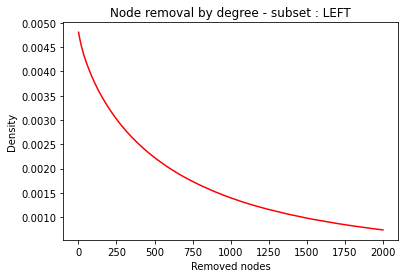

In [123]:
plt.plot(nodes_rem, list_density, 'r-')
plt.title("Node removal by degree - subset : "+ subset_str)
plt.ylabel("Density")
plt.xlabel("Removed nodes")
plt.show()

### By hate_index

In [124]:
#Here we select the nodes and sort them by hate_index
#select nodes over their degree!
selected_nodes = [x for x in sorted_hate_index if x[1] > 0 ]
print("Total nodes to be removed:", len(selected_nodes))
nodes_removed = []
for i,v in enumerate(selected_nodes): 
    nodes_removed.append(selected_nodes[i][0])

Total nodes to be removed: 753


In [125]:
#Node Removal, for robustness, removing 1 by 1 starting by nodes with highest hate_index
G1 = G.copy()
list_density = []
nodes_rem = []
for i, node in enumerate(nodes_removed):
    if (i % 50 == 0):
        print("Removing ", i ,"/", len(nodes_removed))
    G1.remove_node(node)
    list_density.append(nx.density(G1))
    #list_transitivity.append(nx.transitivity(G1)) #we can use it to measure robustness
    nodes_rem.append(i+1)

Removing  0 / 753
Removing  1 / 753
Removing  2 / 753
Removing  3 / 753
Removing  4 / 753
Removing  5 / 753
Removing  6 / 753
Removing  7 / 753
Removing  8 / 753
Removing  9 / 753
Removing  10 / 753
Removing  11 / 753
Removing  12 / 753
Removing  13 / 753
Removing  14 / 753
Removing  15 / 753
Removing  16 / 753
Removing  17 / 753
Removing  18 / 753
Removing  19 / 753
Removing  20 / 753
Removing  21 / 753
Removing  22 / 753
Removing  23 / 753
Removing  24 / 753
Removing  25 / 753
Removing  26 / 753
Removing  27 / 753
Removing  28 / 753
Removing  29 / 753
Removing  30 / 753
Removing  31 / 753
Removing  32 / 753
Removing  33 / 753
Removing  34 / 753
Removing  35 / 753
Removing  36 / 753
Removing  37 / 753
Removing  38 / 753
Removing  39 / 753
Removing  40 / 753
Removing  41 / 753
Removing  42 / 753
Removing  43 / 753
Removing  44 / 753
Removing  45 / 753
Removing  46 / 753
Removing  47 / 753
Removing  48 / 753
Removing  49 / 753
Removing  50 / 753
Removing  51 / 753
Removing  52 / 753
Rem

Removing  417 / 753
Removing  418 / 753
Removing  419 / 753
Removing  420 / 753
Removing  421 / 753
Removing  422 / 753
Removing  423 / 753
Removing  424 / 753
Removing  425 / 753
Removing  426 / 753
Removing  427 / 753
Removing  428 / 753
Removing  429 / 753
Removing  430 / 753
Removing  431 / 753
Removing  432 / 753
Removing  433 / 753
Removing  434 / 753
Removing  435 / 753
Removing  436 / 753
Removing  437 / 753
Removing  438 / 753
Removing  439 / 753
Removing  440 / 753
Removing  441 / 753
Removing  442 / 753
Removing  443 / 753
Removing  444 / 753
Removing  445 / 753
Removing  446 / 753
Removing  447 / 753
Removing  448 / 753
Removing  449 / 753
Removing  450 / 753
Removing  451 / 753
Removing  452 / 753
Removing  453 / 753
Removing  454 / 753
Removing  455 / 753
Removing  456 / 753
Removing  457 / 753
Removing  458 / 753
Removing  459 / 753
Removing  460 / 753
Removing  461 / 753
Removing  462 / 753
Removing  463 / 753
Removing  464 / 753
Removing  465 / 753
Removing  466 / 753


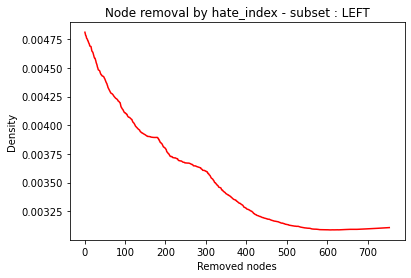

In [126]:
plt.plot(nodes_rem, list_density, 'r-')
plt.title("Node removal by hate_index - subset : "+ subset_str)
plt.ylabel("Density")
plt.xlabel("Removed nodes")
plt.show()

### By polarity

In [127]:
#Here we select the nodes and sort them by degree
#select nodes over their degree!
selected_nodes = [x for x in sorted_hate_polar if x[1] < 0 ]
print("Total nodes to be removed:", len(selected_nodes))
nodes_removed = []
for i,v in enumerate(selected_nodes): 
    nodes_removed.append(selected_nodes[i][0])

Total nodes to be removed: 9943


In [128]:
#Node Removal, for robustness, removing 1 by 1 starting by nodes with highest hate_index
G1 = G.copy()
list_density = []
nodes_rem = []
for i, node in enumerate(nodes_removed):
    if (i % 50 == 0):
        print("Removing ", i ,"/", len(nodes_removed))
    G1.remove_node(node)
    list_density.append(nx.density(G1))
    #list_transitivity.append(nx.transitivity(G1)) #we can use it to measure robustness
    nodes_rem.append(i+1)

Removing  0 / 9943
Removing  50 / 9943
Removing  100 / 9943
Removing  150 / 9943
Removing  200 / 9943
Removing  250 / 9943
Removing  300 / 9943
Removing  350 / 9943
Removing  400 / 9943
Removing  450 / 9943
Removing  500 / 9943
Removing  550 / 9943
Removing  600 / 9943
Removing  650 / 9943
Removing  700 / 9943
Removing  750 / 9943
Removing  800 / 9943
Removing  850 / 9943
Removing  900 / 9943
Removing  950 / 9943
Removing  1000 / 9943
Removing  1050 / 9943
Removing  1100 / 9943
Removing  1150 / 9943
Removing  1200 / 9943
Removing  1250 / 9943
Removing  1300 / 9943
Removing  1350 / 9943
Removing  1400 / 9943
Removing  1450 / 9943
Removing  1500 / 9943
Removing  1550 / 9943
Removing  1600 / 9943
Removing  1650 / 9943
Removing  1700 / 9943
Removing  1750 / 9943
Removing  1800 / 9943
Removing  1850 / 9943
Removing  1900 / 9943
Removing  1950 / 9943
Removing  2000 / 9943
Removing  2050 / 9943
Removing  2100 / 9943
Removing  2150 / 9943
Removing  2200 / 9943
Removing  2250 / 9943
Removing  2

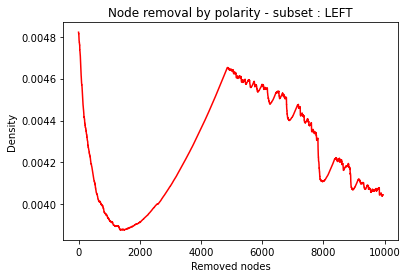

In [129]:
plt.plot(nodes_rem, list_density, 'r-')
plt.title("Node removal by polarity - subset : "+ subset_str)
plt.ylabel("Density")
plt.xlabel("Removed nodes")
plt.show()

### By polarity*degree

In [130]:
pol_degree_nodes        = [(x[0],x[1]*degree_dict.get(x[0])) for x in sorted_hate_polar if x[1] < 0 ]
pol_degree_nodes_sorted = sorted(pol_degree_nodes, key=lambda tup: tup[1], reverse = False)

#Here we select the nodes and sort them by polarity*degree
#select nodes over their degree!
#Here we select the nodes and sort them by degree
# selected_nodes = list(pol_degree_nodes_sorted)[:2000] #20 nodes to be removed just for simplicity you can choose any number
selected_nodes = list(pol_degree_nodes_sorted) #20 nodes to be removed just for simplicity you can choose any number
#TOP 2000 nodes to remove
nodes_removed = []
for i,v in enumerate(selected_nodes): 
    nodes_removed.append(selected_nodes[i][0])

In [131]:
#Node Removal, for robustness, removing 1 by 1 starting by nodes with highest hate_index
G1 = G.copy()
list_density = []
nodes_rem = []
for i, node in enumerate(nodes_removed):
    if (i % 50 == 0):
        print("Removing ", i ,"/", len(nodes_removed))
    G1.remove_node(node)
    list_density.append(nx.density(G1))
    #list_transitivity.append(nx.transitivity(G1)) #we can use it to measure robustness
    nodes_rem.append(i+1)

Removing  0 / 9943
Removing  50 / 9943
Removing  100 / 9943
Removing  150 / 9943
Removing  200 / 9943
Removing  250 / 9943
Removing  300 / 9943
Removing  350 / 9943
Removing  400 / 9943
Removing  450 / 9943
Removing  500 / 9943
Removing  550 / 9943
Removing  600 / 9943
Removing  650 / 9943
Removing  700 / 9943
Removing  750 / 9943
Removing  800 / 9943
Removing  850 / 9943
Removing  900 / 9943
Removing  950 / 9943
Removing  1000 / 9943
Removing  1050 / 9943
Removing  1100 / 9943
Removing  1150 / 9943
Removing  1200 / 9943
Removing  1250 / 9943
Removing  1300 / 9943
Removing  1350 / 9943
Removing  1400 / 9943
Removing  1450 / 9943
Removing  1500 / 9943
Removing  1550 / 9943
Removing  1600 / 9943
Removing  1650 / 9943
Removing  1700 / 9943
Removing  1750 / 9943
Removing  1800 / 9943
Removing  1850 / 9943
Removing  1900 / 9943
Removing  1950 / 9943
Removing  2000 / 9943
Removing  2050 / 9943
Removing  2100 / 9943
Removing  2150 / 9943
Removing  2200 / 9943
Removing  2250 / 9943
Removing  2

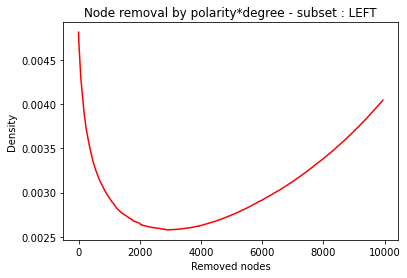

In [132]:
plt.plot(nodes_rem, list_density, 'r-')
plt.title("Node removal by polarity*degree - subset : "+ subset_str)
plt.ylabel("Density")
plt.xlabel("Removed nodes")
plt.show()

In [ ]:
nodes_df_LEFT = pd.read_csv('subsets/NODES_sinistra_hate_subset.csv', low_memory=False)
edges_df_LEFT = pd.read_csv('subsets/EDGES_sinistra_hate_subset.csv', low_memory=False)
subset_str_L  = 'LEFT'
    
nodes_df_RIGHT   = pd.read_csv('subsets/NODES_destra_hate_subset.csv', low_memory=False)
edges_df_RIGHT   = pd.read_csv('subsets/EDGES_destra_hate_subset.csv', low_memory=False)
subset_str_R     = 'RIGHT'
    
G_L = nx.from_pandas_edgelist(edges_df_LEFT, 'source', 'target', ['weight'])
G_R = nx.from_pandas_edgelist(edges_df_RIGHT, 'source', 'target', ['weight'])
    
data_L = nodes_df_LEFT.set_index('id').to_dict('index').items()
data_R = nodes_df_RIGHT.set_index('id').to_dict('index').items()

G_L.add_nodes_from(data_L)
G_R.add_nodes_from(data_R)

Removing  0 / 2000
Removing  1000 / 2000
Now executing node removal according to degree...
Removing  0 / 2000
Removing  1000 / 2000


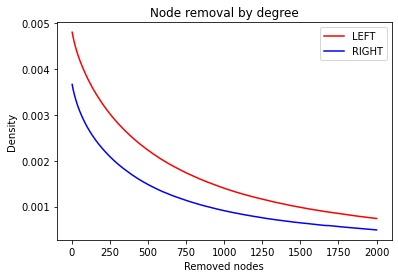

Now executing node removal according to hate_index...
Removing  0 / 753
Removing  0 / 1447
Removing  1000 / 1447


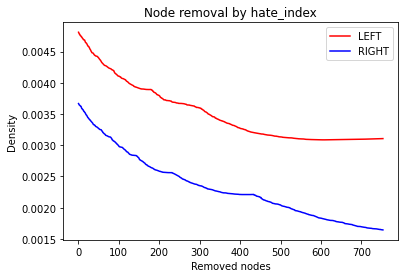

Now executing node removal according to polarity...
Removing  0 / 9943
Removing  1000 / 9943
Removing  2000 / 9943
Removing  3000 / 9943
Removing  4000 / 9943
Removing  5000 / 9943
Removing  6000 / 9943
Removing  7000 / 9943
Removing  8000 / 9943
Removing  9000 / 9943
Removing  0 / 8265
Removing  1000 / 8265
Removing  2000 / 8265
Removing  3000 / 8265
Removing  4000 / 8265
Removing  5000 / 8265
Removing  6000 / 8265
Removing  7000 / 8265
Removing  8000 / 8265


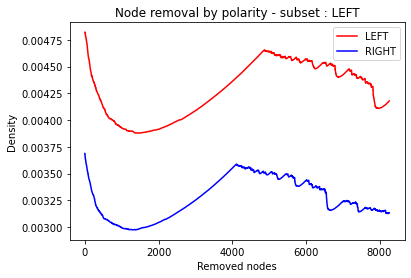

Now executing node removal according to polarity*degree...
Removing  0 / 9943
Removing  1000 / 9943
Removing  2000 / 9943
Removing  3000 / 9943
Removing  4000 / 9943
Removing  5000 / 9943
Removing  6000 / 9943
Removing  7000 / 9943
Removing  8000 / 9943
Removing  9000 / 9943
Removing  0 / 8265
Removing  1000 / 8265
Removing  2000 / 8265
Removing  3000 / 8265
Removing  4000 / 8265
Removing  5000 / 8265
Removing  6000 / 8265
Removing  7000 / 8265
Removing  8000 / 8265


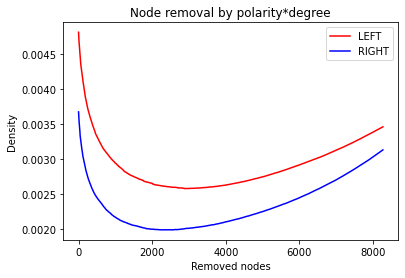

In [147]:

def node_removal(G_L, G_R):
    
    ##########################
    ###### Using Degree ######
    ##########################
    
    
    #Left posts degree
    degree_dict_L = dict(G_L.degree(G_L.nodes()))
    nx.set_node_attributes(G_L, degree_dict_L, 'degree')
    sorted_degree_L = sorted(degree_dict_L.items(), key=itemgetter(1), reverse=True)
    labels_dict_L   = nx.get_node_attributes(G_L,'label')
    hate_index_dict_L = nx.get_node_attributes(G_L,'counts_hate')
    sorted_hate_index_L = sorted(hate_index_dict_L.items(), key=itemgetter(1), reverse=True)
    hate_polar_dict_L = nx.get_node_attributes(G_L,'polarity')
    sorted_hate_polar_L = sorted(hate_polar_dict_L.items(), key=itemgetter(1), reverse=False)
    
    #Here we select the nodes and sort them by degree
    selected_nodes_L = list(sorted_degree_L)[:2000]
    nodes_removed_L = []
    for i,v in enumerate(selected_nodes_L): 
        nodes_removed_L.append(selected_nodes_L[i][0])
        
    #Node Removal, for robustness, removing 1 by 1 starting by nodes with highest degrees
    G1_L           = G_L.copy()
    list_density_L = []
    nodes_rem_L    = []
    for i, node in enumerate(nodes_removed_L):
        if (i % 1000 == 0):
            print("Removing ", i ,"/", len(nodes_removed_L))
        G1_L.remove_node(node)
        list_density_L.append(nx.density(G1_L)) #returns an error 
        nodes_rem_L.append(i+1)
    
    #Right posts degree
    degree_dict_R = dict(G_R.degree(G_R.nodes()))
    nx.set_node_attributes(G_R, degree_dict_R, 'degree')
    sorted_degree_R = sorted(degree_dict_R.items(), key=itemgetter(1), reverse=True)
    labels_dict_R   = nx.get_node_attributes(G_R,'label')
    hate_index_dict_R = nx.get_node_attributes(G_R,'counts_hate')
    sorted_hate_index_R = sorted(hate_index_dict_R.items(), key=itemgetter(1), reverse=True)
    hate_polar_dict_R = nx.get_node_attributes(G_R,'polarity')
    sorted_hate_polar_R = sorted(hate_polar_dict_R.items(), key=itemgetter(1), reverse=False)
    
    print("Now executing node removal according to degree...")
    
    #Here we select the nodes and sort them by degree
    selected_nodes_R = list(sorted_degree_R)[:2000]
    nodes_removed_R = []
    for i,v in enumerate(selected_nodes_R): 
        nodes_removed_R.append(selected_nodes_R[i][0])
        
    #Node Removal, for robustness, removing 1 by 1 starting by nodes with highest degrees
    G1_R           = G_R.copy()
    list_density_R = []
    nodes_rem_R    = []
    for i, node in enumerate(nodes_removed_R):
        if (i % 1000 == 0):
            print("Removing ", i ,"/", len(nodes_removed_R))
        G1_R.remove_node(node)
        list_density_R.append(nx.density(G1_R)) #returns an error 
        nodes_rem_R.append(i+1)
        
    max_numb_iter = min([len(list_density_L), len(nodes_rem_R)])

    plt.plot(np.array(nodes_rem_L)[:max_numb_iter], np.array(list_density_L)[:max_numb_iter], 'r-', label = 'LEFT')
    plt.plot(np.array(nodes_rem_R)[:max_numb_iter], np.array(list_density_R)[:max_numb_iter], 'b-', label = 'RIGHT')
    plt.title("Node removal by degree")
    plt.ylabel("Density")
    plt.xlabel("Removed nodes")
    plt.legend()
    plt.savefig('NodeRemoval_degree.png')
    plt.show()
    
    
    
    ############################
    ###### Using hate index ####
    ############################
    
    print("Now executing node removal according to hate_index...")
    
    selected_nodes_L = [x for x in sorted_hate_index_L if x[1] > 0 ]
    nodes_removed_L  = []
    for i,v in enumerate(selected_nodes_L): 
        nodes_removed_L.append(selected_nodes_L[i][0])

    #Node Removal, for robustness, removing 1 by 1 starting by nodes with highest hate_index
    G1_L = G_L.copy()
    list_density_L = []
    nodes_rem_L = []
    for i, node in enumerate(nodes_removed_L):
        if (i % 1000 == 0):
            print("Removing ", i ,"/", len(nodes_removed_L))
        G1_L.remove_node(node)
        list_density_L.append(nx.density(G1_L))
        nodes_rem_L.append(i+1)

    #Using hate index
    selected_nodes_R = [x for x in sorted_hate_index_R if x[1] > 0 ]
    nodes_removed_R = []
    for i,v in enumerate(selected_nodes_R): 
        nodes_removed_R.append(selected_nodes_R[i][0])

    #Node Removal, for robustness, removing 1 by 1 starting by nodes with highest hate_index
    G1_R = G_R.copy()
    list_density_R = []
    nodes_rem_R = []
    for i, node in enumerate(nodes_removed_R):
        if (i % 1000 == 0):
            print("Removing ", i ,"/", len(nodes_removed_R))
        G1_R.remove_node(node)
        list_density_R.append(nx.density(G1_R))
        nodes_rem_R.append(i+1)
    
    max_numb_iter = min([len(list_density_L), len(nodes_rem_R)])
    plt.plot(np.array(nodes_rem_L)[:max_numb_iter], np.array(list_density_L)[:max_numb_iter], 'r-', label = 'LEFT')
    plt.plot(np.array(nodes_rem_R)[:max_numb_iter], np.array(list_density_R)[:max_numb_iter], 'b-', label = 'RIGHT')
    plt.title("Node removal by hate_index")
    plt.ylabel("Density")
    plt.xlabel("Removed nodes")
    plt.savefig('NodeRemoval_hateindex.png')
    plt.legend()
    plt.show()

    
    ############################
    ###### Using polarity ######
    ############################
    
    print("Now executing node removal according to polarity...")

    selected_nodes_L = [x for x in sorted_hate_polar_L if x[1] < 0 ]
    nodes_removed_L = []
    for i,v in enumerate(selected_nodes_L): 
        nodes_removed_L.append(selected_nodes_L[i][0])

    #Node Removal, for robustness, removing 1 by 1 starting by nodes with highest hate_index
    G1_L = G_L.copy()
    list_density_L = []
    nodes_rem_L = []
    for i, node in enumerate(nodes_removed_L):
        if (i % 1000 == 0):
            print("Removing ", i ,"/", len(nodes_removed_L))
        G1_L.remove_node(node)
        list_density_L.append(nx.density(G1_L))
        nodes_rem_L.append(i+1)

    selected_nodes_R = [x for x in sorted_hate_polar_R if x[1] < 0 ]
    nodes_removed_R = []
    for i,v in enumerate(selected_nodes_R): 
        nodes_removed_R.append(selected_nodes_R[i][0])

    #Node Removal, for robustness, removing 1 by 1 starting by nodes with highest hate_index
    G1_R = G_R.copy()
    list_density_R = []
    nodes_rem_R = []
    for i, node in enumerate(nodes_removed_R):
        if (i % 1000 == 0):
            print("Removing ", i ,"/", len(nodes_removed_R))
        G1_R.remove_node(node)
        list_density_R.append(nx.density(G1_R))
        nodes_rem_R.append(i+1)
        
    max_numb_iter = min([len(list_density_L), len(nodes_rem_R)])

    plt.plot(np.array(nodes_rem_L)[:max_numb_iter], np.array(list_density_L)[:max_numb_iter], 'r-', label = 'LEFT')
    plt.plot(np.array(nodes_rem_R)[:max_numb_iter], np.array(list_density_R)[:max_numb_iter], 'b-', label = 'RIGHT')
    plt.title("Node removal by polarity")
    plt.ylabel("Density")
    plt.xlabel("Removed nodes")
    plt.savefig('NodeRemoval_polarity.png')
    plt.legend()
    plt.show()
    
    ###################################
    ###### Using polarity*degree ######
    ###################################
    
    print("Now executing node removal according to polarity*degree...")
    
    pol_degree_nodes_L        = [(x[0],x[1]*degree_dict_L.get(x[0])) for x in sorted_hate_polar_L if x[1] < 0 ]
    pol_degree_nodes_sorted_L = sorted(pol_degree_nodes_L, key=lambda tup: tup[1], reverse = False)
    selected_nodes_L = list(pol_degree_nodes_sorted_L) 
    nodes_removed_L = []
    for i,v in enumerate(selected_nodes_L): 
        nodes_removed_L.append(selected_nodes_L[i][0])

    #Node Removal, for robustness, removing 1 by 1 starting by nodes with highest hate_index
    G1_L = G_L.copy()
    list_density_L = []
    nodes_rem_L = []
    for i, node in enumerate(nodes_removed_L):
        if (i % 1000 == 0):
            print("Removing ", i ,"/", len(nodes_removed_L))
        G1_L.remove_node(node)
        list_density_L.append(nx.density(G1_L))
        nodes_rem_L.append(i+1)

        
    pol_degree_nodes_R        = [(x[0],x[1]*degree_dict_R.get(x[0])) for x in sorted_hate_polar_R if x[1] < 0 ]
    pol_degree_nodes_sorted_R = sorted(pol_degree_nodes_R, key=lambda tup: tup[1], reverse = False)
    selected_nodes_R = list(pol_degree_nodes_sorted_R) 
    nodes_removed_R = []
    for i,v in enumerate(selected_nodes_R): 
        nodes_removed_R.append(selected_nodes_R[i][0])

    #Node Removal, for robustness, removing 1 by 1 starting by nodes with highest hate_index
    G1_R = G_R.copy()
    list_density_R = []
    nodes_rem_R = []
    for i, node in enumerate(nodes_removed_R):
        if (i % 1000 == 0):
            print("Removing ", i ,"/", len(nodes_removed_R))
        G1_R.remove_node(node)
        list_density_R.append(nx.density(G1_R))
        nodes_rem_R.append(i+1)    
        
    max_numb_iter = min([len(list_density_L), len(nodes_rem_R)])

    plt.plot(np.array(nodes_rem_L)[:max_numb_iter], np.array(list_density_L)[:max_numb_iter], 'r-', label = 'LEFT')
    plt.plot(np.array(nodes_rem_R)[:max_numb_iter], np.array(list_density_R)[:max_numb_iter], 'b-', label = 'RIGHT')
    plt.title("Node removal by polarity*degree")
    plt.ylabel("Density")
    plt.xlabel("Removed nodes")
    plt.savefig('NodeRemoval_polarityDegree.png')
    plt.legend()
    plt.show()
    
    
node_removal(G_L, G_R)